In [1]:
# Import libraries
import numpy as np
import itertools

In [2]:
# Find a subset of r linearly independent columns of A (if it exists)
def non_redundant(A, r):
    rows, cols = A.shape
    indices = range(cols) #[0, 1, ..., cols-1]
    
    # Iterate among all subsets of r columns
    for subcols in itertools.combinations(indices, r):
        subA = A[:, subcols]
        r_subA = np.linalg.matrix_rank(subA)
        if r_subA == r:
            return subA

In [3]:
# Build the market
# Bond
B1 = np.array([10, 10, 10])
B0 = 10

# Stock 1
S1_1 = np.array([30, 20, 10])
S1_0 = 20

# Stock 2
S2_1 = np.array([15, 5, 0])
S2_0 = 6

# Stock 3
S3_1 = np.array([60, 40, 20])
S3_0 = 40

In [4]:
# Payoffs at time T = 1
M1 = np.array([B1, S1_1, S2_1, S3_1]).T
M1

array([[10, 30, 15, 60],
       [10, 20,  5, 40],
       [10, 10,  0, 20]])

In [5]:
# Prices at time t = 0
M0 = np.array([B0, S1_0, S2_0, S3_0]).reshape(1, 4)
M0

array([[10, 20,  6, 40]])

In [6]:
# Point 1.
# Extract the submarket with 3 non-redundant assets
M1s = non_redundant(M1, 3)
M1s

array([[10, 30, 15],
       [10, 20,  5],
       [10, 10,  0]])

In [7]:
# Create the corresponding sub-vector of prices
M0s = np.array([B0, S1_0, S2_0]).reshape(1, 3)
M0s

array([[10, 20,  6]])

In [8]:
# Point 2.
# Verify that the submarket is complete
r = np.linalg.matrix_rank(M1s)
rows, cols = M1s.shape

if r == rows:
    print('The market is complete')
else:
    print('The market is incomplete')
    
if r == rows and r == cols:
    print('No redundant assets')

The market is complete
No redundant assets


In [9]:
# Point 3.
# Create an array of strike prices for a call option
K = np.arange(0, 21)
K

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [10]:
# Create an empty list of call prices
C0_prices = []

In [11]:
# For each strike price
for i in range(len(K)):
    # Create the payoff of the call with the current K[i]
    C1 = np.maximum(S1_1 - K[i], 0)
    C1 = C1.reshape(3, 1)
    
    # Build the replicating portfolio
    M1sinv = np.linalg.inv(M1s)
    theta = M1sinv @ C1
    
    # Compute the no-arbitrage price of the call
    C0 = M0s @ theta
    C0 = C0[0, 0]
    
    # Insert the current call price in the list of call prices
    C0_prices.append(C0)

In [12]:
C0_prices

[19.99999999999998,
 18.999999999999982,
 17.99999999999997,
 16.99999999999998,
 15.999999999999977,
 14.999999999999984,
 13.999999999999993,
 12.999999999999982,
 11.999999999999984,
 10.99999999999999,
 9.999999999999986,
 9.199999999999983,
 8.399999999999991,
 7.599999999999995,
 6.799999999999992,
 5.999999999999993,
 5.199999999999995,
 4.399999999999995,
 3.599999999999997,
 2.799999999999999,
 2.0]

Text(0.5, 1.0, 'Call price as a function of K')

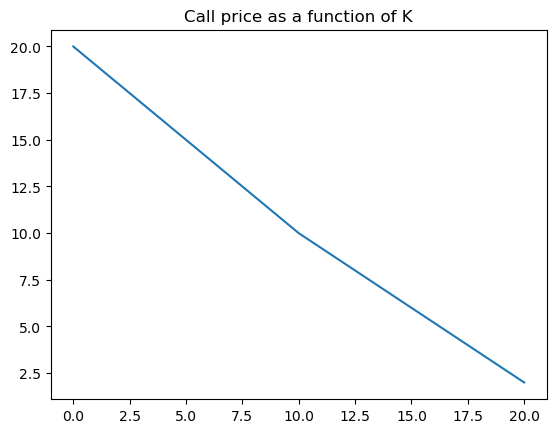

In [13]:
# Point 4.
# Plot the graph of call price as a function of K
# K is on the x axis and C0 on the y axis
import matplotlib.pyplot as plt

plt.plot(K, C0_prices)
plt.title('Call price as a function of K')